In [1]:
import pandas as pd, seaborn as sns

In [2]:
train=pd.read_csv(r"C:\Python\PY DS\Titanic modelling\Titanic Train.csv")
test=pd.read_csv(r"C:\Python\PY DS\Titanic modelling\Titanic Test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_row=train.shape[0]
train_row

891

In [7]:
train_null=train.isnull().sum()
train_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_null_percent=train_null/train_row*100
train_null_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
#train data cleaning

In [10]:
#Cabin has 77% null data so drop the cabin column

In [11]:
train=train.drop(columns=["Cabin","PassengerId","Name","Ticket"],axis=1)6

In [12]:
#Age is integer so replace the null values by mean

In [13]:
train["Age"]=train["Age"].fillna(train["Age"].mean())

In [14]:
#Embarked null values are less, then replace null values by bfill

In [15]:
train["Embarked"]=train["Embarked"].fillna(train["Embarked"].mode()[0])

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
#our train data is cleaned

In [18]:
#test data cleaning

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [20]:
#we have dropped Cabin from train so we have to drop it from test

In [21]:
test=test.drop(columns=["Cabin","PassengerId","Name","Ticket"],axis=1)

In [22]:
#Age is integer so replace the null values by mean (same as train data)

In [23]:
test["Age"]=test["Age"].fillna(test["Age"].mean())

In [24]:
#Embarked null values are less, then replace null values by bfill (same as train data)

In [25]:
test["Embarked"]=test["Embarked"].fillna(test["Embarked"].mode()[0])

In [26]:
# In test data we have a null value in fare also
#Fare is integer so replace the null values by mean 

In [27]:
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [29]:
# Our test data is also cleaned

In [30]:
#EDA

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

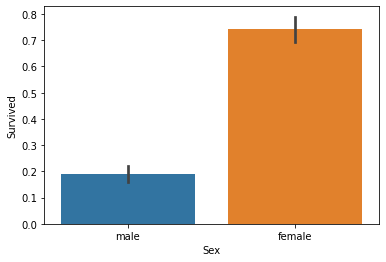

In [31]:
sns.barplot(x="Sex",y="Survived",data=train)

In [32]:
# from above graph we conclude that more female survived as compared to male
# female was given the priority to survive

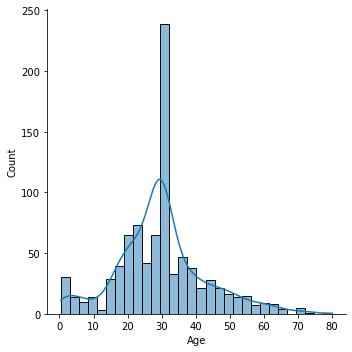

In [33]:
sns.displot(x=train["Age"],kde=True)

<AxesSubplot:>

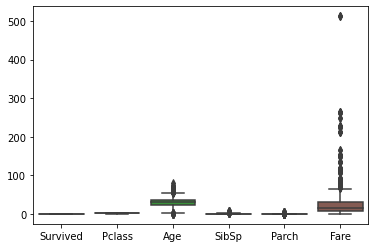

In [34]:
sns.boxplot(data=train)

In [35]:
# Data preprocessing

In [36]:
# First step
# Convert object data to numerical
# For this we have to use Label encoder

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
object_list=train.select_dtypes(include="object").columns
object_list

Index(['Sex', 'Embarked'], dtype='object')

In [39]:
for i in object_list:
    train[i]=le.fit_transform(train[i])

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [41]:
#train data is converted into numerical

In [42]:
#repeat the same for test data

In [43]:
for i in object_list:
    test[i]=le.fit_transform(test[i])

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [45]:
#test data is alse converted into numerical

In [46]:
# seperate X_train, y_train, X_test, y_test (X is capital and y is small)
# X_train=input of train data , y_train=output of train data
# X_test=input of test data , y_test=output of test data

In [47]:
X_train=train.drop(columns=["Survived"],axis=1)
y_train=train["Survived"]

In [48]:
X_test=test.drop(columns=["Survived"],axis=1)
y_test=test["Survived"]

In [49]:
# Second step
# Scaling the data
# For this we have to use StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [51]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
#for checking accuracy of models

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
list_algo=[LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]

In [55]:
for algo in list_algo:
    model=algo
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"the score of {algo} is {algo.score(X_test,y_test)*100} %")

the score of LinearRegression() is 68.37525206242971 %
the score of Ridge() is 68.3455485065324 %
the score of Lasso() is -0.17636684303348193 %
the score of DecisionTreeRegressor() is 9.64745196324145 %
the score of KNeighborsRegressor() is 49.96240601503759 %
